In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision.datasets as datasets
from torchvision import models
import torchvision.transforms as transforms
from torch.autograd import Variable
torch.__version__

'2.4.1+cu121'

In [ ]:
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=128,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=128,
                                          shuffle=False)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

(3, 482, 242)


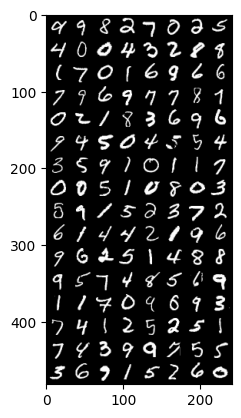

tensor([9, 9, 8, 2, 7, 0, 2, 5, 4, 0, 0, 4, 3, 2, 8, 8, 1, 7, 0, 1, 6, 9, 6, 6,
        7, 9, 6, 9, 7, 7, 8, 7, 0, 2, 1, 8, 3, 6, 9, 6, 9, 4, 5, 0, 4, 5, 5, 4,
        3, 5, 9, 1, 0, 1, 1, 7, 0, 0, 5, 1, 0, 8, 0, 3, 5, 9, 1, 5, 2, 3, 7, 2,
        6, 1, 4, 4, 2, 1, 9, 6, 9, 6, 2, 5, 1, 4, 8, 8, 9, 5, 7, 4, 8, 5, 6, 9,
        1, 1, 7, 0, 9, 6, 9, 3, 7, 4, 1, 2, 5, 2, 5, 1, 7, 4, 3, 9, 9, 7, 5, 5,
        3, 6, 9, 1, 5, 2, 6, 0])


In [ ]:
import torchvision
images, labels = next(iter(train_loader))    # get one batch from data loader
img_grid = torchvision.utils.make_grid(images)    # make a grid from batch
img_grid = img_grid.numpy()    # convert images to numpy for display
print(img_grid.shape)
plt.imshow(np.transpose(img_grid,  (1, 2, 0)))
plt.show()
print(labels)

In [ ]:
CNN_model = models.resnet18(pretrained=True)
import torch.nn as nn
CNN_model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
num_ftrs = CNN_model.fc.in_features
CNN_model.fc = nn.Linear(num_ftrs, 10)
CNN_model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNN_model.parameters(), lr=0.001)
num_epochs = 10

In [ ]:
loss_list = []
iteration_list = []
accuracy_list = []
for i in range(num_epochs):
  for j, (images, labels) in enumerate(train_loader):
    images = Variable(images.to(device))
    labels = Variable(labels.to(device))
    images=images.view(-1, 1, 28, 28)
    optimizer.zero_grad()
    outputs = CNN_model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    if j % len(train_loader) == 0:
      loss_list.append(loss.item())
      iteration_list.append(i*len(train_loader)+j)
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(i+1, num_epochs, j+1, len(train_loader), loss.item()))
  correct = 0
  total = 0
  with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          images = images.view(-1, 1, 28, 28)
          outputs = CNN_model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))
  accuracy_list.append(100 * correct / total)

Epoch [1/10], Step [1/469], Loss: 2.8295
Test Accuracy of the model on the 10000 test images: 98.29 %
Epoch [2/10], Step [1/469], Loss: 0.0044
Test Accuracy of the model on the 10000 test images: 98.66 %
Epoch [3/10], Step [1/469], Loss: 0.0547
Test Accuracy of the model on the 10000 test images: 98.47 %
Epoch [4/10], Step [1/469], Loss: 0.0305
Test Accuracy of the model on the 10000 test images: 98.79 %
Epoch [5/10], Step [1/469], Loss: 0.0891
Test Accuracy of the model on the 10000 test images: 99.11 %
Epoch [6/10], Step [1/469], Loss: 0.0061
Test Accuracy of the model on the 10000 test images: 99.05 %
Epoch [7/10], Step [1/469], Loss: 0.0058
Test Accuracy of the model on the 10000 test images: 99.09 %
Epoch [8/10], Step [1/469], Loss: 0.0420
Test Accuracy of the model on the 10000 test images: 98.8 %
Epoch [9/10], Step [1/469], Loss: 0.0374
Test Accuracy of the model on the 10000 test images: 99.07 %
Epoch [10/10], Step [1/469], Loss: 0.0019
Test Accuracy of the model on the 10000 t

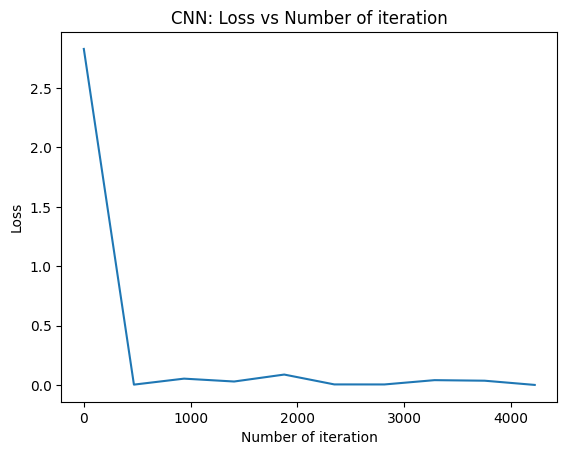

In [ ]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

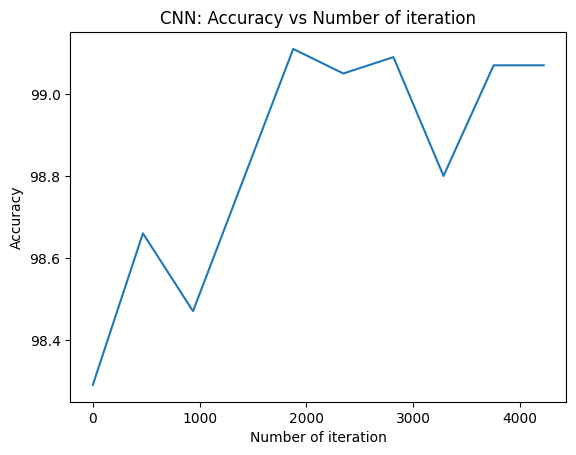

In [ ]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

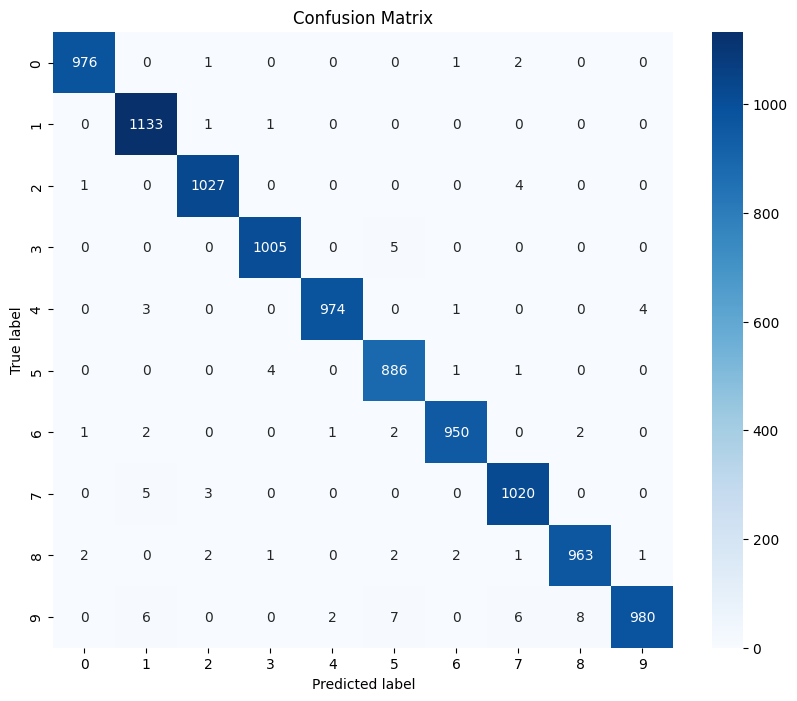

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()
def get_predictions_and_labels(model, test_loader, device):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    return np.array(y_true), np.array(y_pred)
y_true, y_pred = get_predictions_and_labels(CNN_model, test_loader, device)
classes = list(range(10))
plot_confusion_matrix(y_true, y_pred, classes)

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in classes]))